<h1>Graficas de variables meteorólogicas</h1>

<p>Este notebook organiza una serie de spripts bajo un esquema <b>ELT</b> (<em>extract-load-transform</em>) con la finalidad de generar algunas gráficas que valores y comportamientos de las principales variables meteorológicas.</p>

La estructura del proyecto es la siguiente:
```
|--input/ (Datos de entrada e imágenes(logos))
|
|--src/
|    |
|    |- config.py (Ruta a los archivos necesarios para el proyecto y configuración para el extrac_and_load)
|    |
|    |- extract.py (Proceso de extracción y carga de datos en el espacio de trabajo)
|    |
|    |- transform.py (Creación de pandas dataframes con los datos necesarios para cada gráfica o tabla)
|    |
|    |- tables.py (Generacion de tablas)
|    |
|    |_ graphs.py (Generación de gráfica de curvas e histogramas)
|    
|--font/
|    |
|    |_ arial.ttf (Typografía para las tablas)
|
|--notebook/
|    |
|    |- scr2nb.py (Permite importar los scripts in src/ como módulos en el notebook) 
|    |
|    |_ Grafica_de_variables_meteorologicas.ipynb (Este notebook)
|
|__ README.md 
``` 

<h2>Importando las librerías y módulos necesarios</h2>

In [1]:
import src2nb

import os

import pandas as pd

import numpy as np

import config

from extract import extract_and_load

from transform import station_temps_dataframes, station_vars_dataframes, station_temps_for_curves, rainfall_data

from tables import variables_table, temps_table

from graphs import temps_curves, min_categorical_T_histo, max_categorical_T_histo, rainfall_histo

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

warnings.simplefilter("ignore")

<h2>Importando los datos que iran en las tablas</h2>

In [2]:
csv_dataframe_mapping = config.csv_to_dataframe_mapping()

<p>La función csv_to_dataframe_mapping() devuelve un diccionario que tiene como keys el nombre del archivo 
csv con el que se desea trabajar y como values, el nombre del dataframe donde los datos serán ubicados.</p>

```{key: 'precipitacion.csv', value: 'dataframe_de_precipitacion'}```

In [3]:
database, months = extract_and_load(config.INPUT_DIR, csv_dataframe_mapping)

La variable ```database``` es un diccionario que contiene todos los dataframes necesarios para el proyecto.

In [4]:
database.keys()

dict_keys(['rainfall', 'normal_rainfall', 'max_rainfall_24', 'max_rainfall_24_day', 'rainfall_days', 'avg_helio', 'total_helio', 'moisture', 'qne', 'qnh', 'dew_T', 'max_T', 'avg_Tmax', 'day_Tmax', 'avg_T', 'min_T', 'avg_Tmin', 'day_Tmin', 't_0', 't_0_5', 't_35_40', 't_40', 'max_vel', 'avg_vel', 'location'])

<p>Los <i>dataframes</i> de todas las variables siguen el siguiente formato:</p>

In [5]:
database['rainfall'].head()

,Station,code,1,2,3,4,5,6,7,8,9,10,11,12
0,Station_1,9999,57.8,42.5,66.6,5.8,6.5,0.1,0,21.8,18,35,29,128


<h2>Tabla, histogramas y curvas de temperatura</h2>

<p>Se extraen los datos de temperatura de cada estación y se generan las tablas, histogramas y las curvas de temperatura.</p>

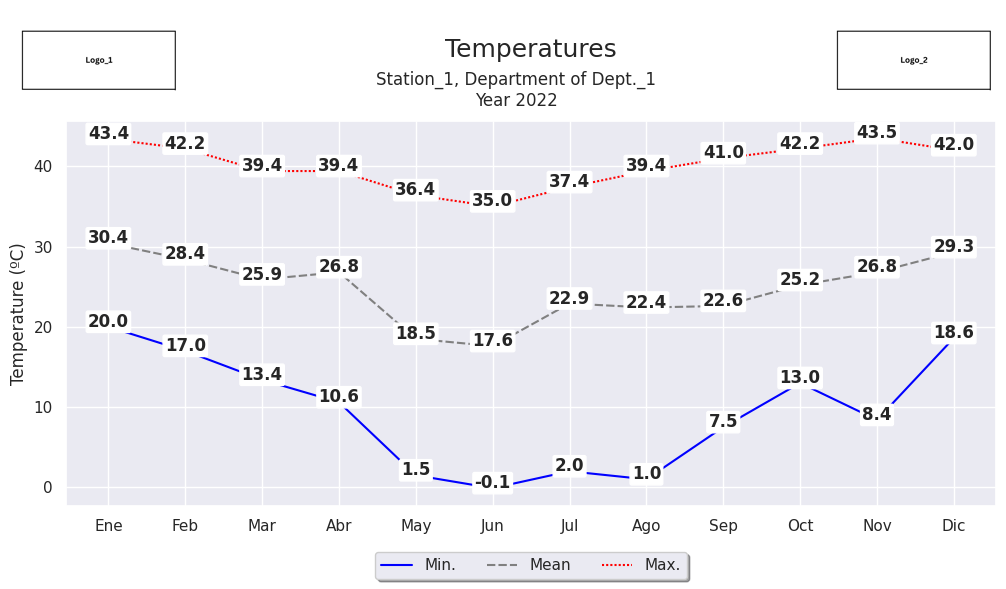

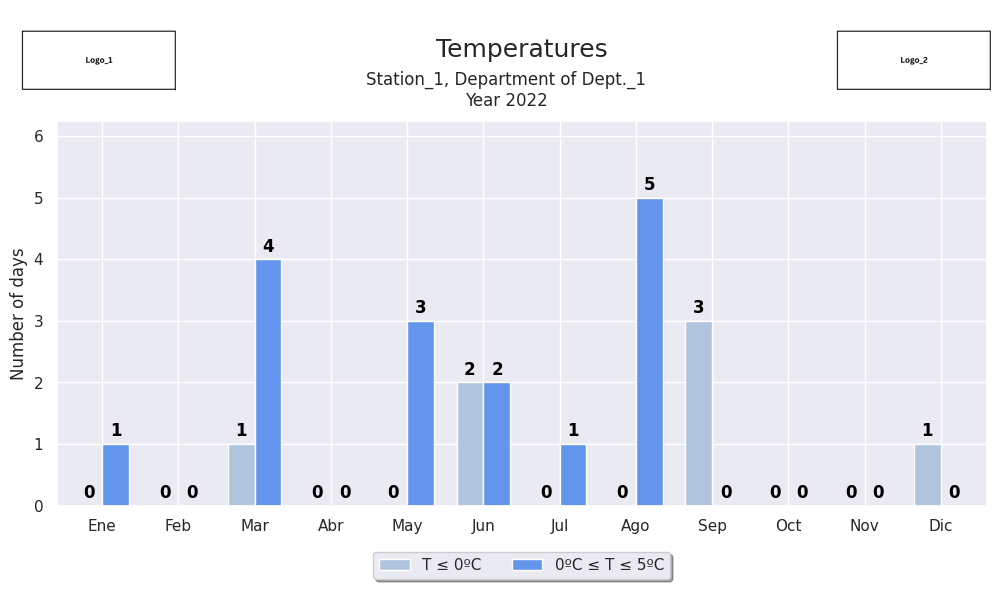

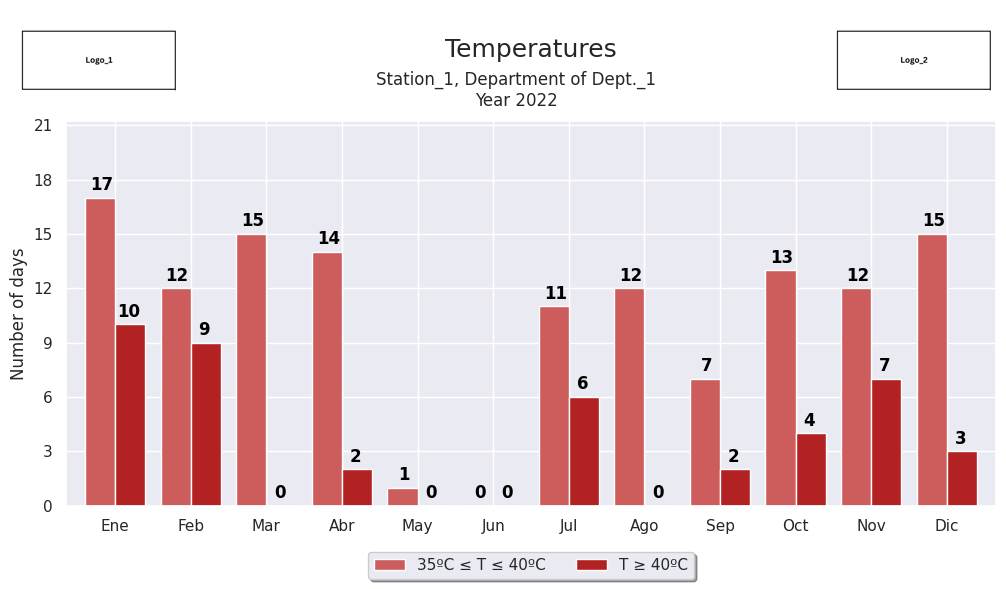

In [6]:
for i in range(database['rainfall'].shape[0]):
    
    #Organización de datos necesarios para la tabla. 
    extr_T,avg_T,cate_T,dew_T,station = station_temps_dataframes(database, months, i)
    
    #Generando la tabla de temperatura.
    temps_table(months,extr_T,avg_T,cate_T,dew_T,station)
    
    #Organización de datos necesarios para la curva de temperaturas. 
    data = station_temps_for_curves(extr_T.iloc[:-1,:], avg_T.iloc[:-1,:])
    
    #Generando las curvas.
    temps_curves(data, months.iloc[:-1,:], station)
    
    #Generando los histogramas de temperaturas extremas, tanto mínimas como máximas.
    min_categorical_T_histo(cate_T.iloc[:-1,:2], months.iloc[:-1,:], station)
    
    max_categorical_T_histo(cate_T.iloc[:-1,2:4], months.iloc[:-1,:], station)

<h2>Tablas de varibales atmosféricas</h2>

<p>En este apartado se ubican en una tabla los valores correspondientes a cada estación de las siguientes variables:</p>

<ul>
    <li>Heliofanía</li>
    <li>Presión</li>
    <li>Precipitación</li>
    <li>Viento</li>
    <li>Humedad</li>
</ul>

además de un gráfico de barras mostrando la precipitación acumulada en el año junto con la normal del periodo 1991-2020.

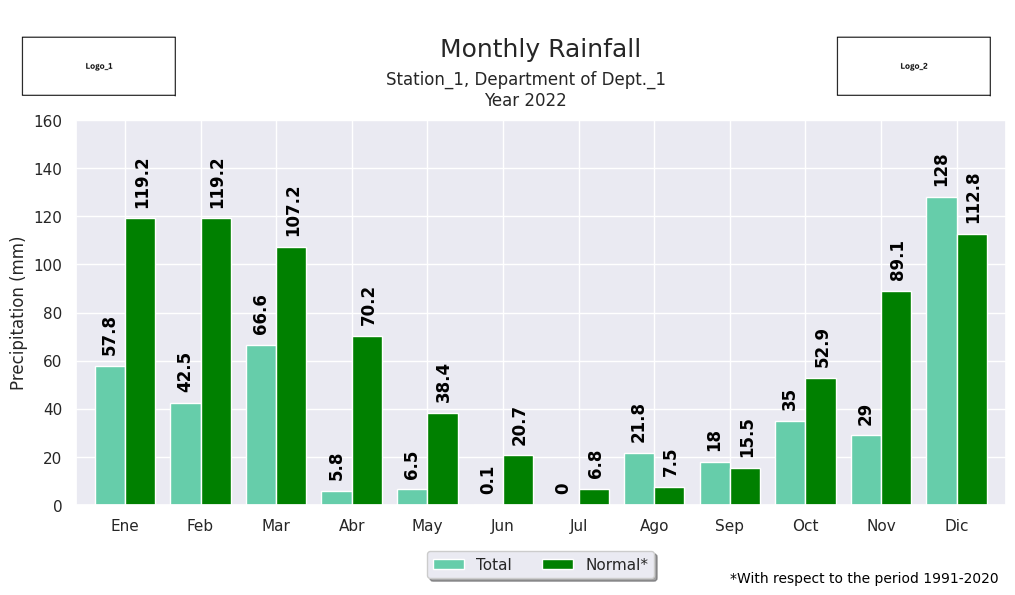

In [7]:
for i in range(database['rainfall'].shape[0]):
    
    heliophany,pres,rainfall,wind,moisture_df,station = station_vars_dataframes(months, database, i)
    
    variables_table(months,heliophany,pres,rainfall,wind,moisture_df,station)
    
    data = rainfall_data(database, i)
    
    rainfall_histo(data, months.iloc[:-1,:],station)